Homework 5 Code

1) Read data and perform EDA

In [1]:
# read data
data = read.csv("prlmis-data-full.csv", header=TRUE, fileEncoding="UTF-8-BOM")
head(data)

YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,...,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
15,3,1,0,2,2,0,3,4,1,...,10,1,5,5,0,5,2,2,6,0
15,3,0,0,3,1,0,6,7,1,...,10,1,5,5,0,4,3,5,5,0
15,2,0,0,3,0,0,4,2,1,...,9,1,5,5,0,4,2,3,7,2
15,1,0,0,1,0,0,5,0,1,...,9,1,5,5,0,3,2,2,0,0
15,5,0,0,3,0,0,5,2,1,...,9,1,5,5,3,2,2,2,7,0
15,3,0,0,2,2,0,5,3,1,...,8,1,5,5,0,2,2,4,0,0


In [2]:
library(dplyr)

# remove alternate response variables
data = select(data, -c("PRLANY","PRLMISAB"))

# get data dimensions
dim(data)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 170317     19

In [3]:
# update categorical values from raw dataset to be descriptive
data$YEAR <- replace(data$YEAR, data$YEAR=="15", "2015")
data$YEAR <- replace(data$YEAR, data$YEAR=="16", "2016")
data$YEAR <- replace(data$YEAR, data$YEAR=="17", "2017")

data$AGECAT <- replace(data$AGECAT, data$AGECAT=="1", "12-17")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="2", "18-25")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="3", "26-35")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="4", "36-49")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="5", "50+")

data$SEX <- replace(data$SEX, data$SEX=="0", "Male")
data$SEX <- replace(data$SEX, data$SEX=="1", "Female")

data$MARRIED <- replace(data$MARRIED, data$MARRIED=="0", "Unmarried")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="1", "Divorced")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="2", "Widowed")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="3", "Married")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="4", "Married")

data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="1", "School Age")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="2", "Some HS")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="3", "HS grad")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="4", "Some College")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="5", "College Grad")

data$EMPLOY18 <- replace(data$EMPLOY18, data$EMPLOY18=="0", "Unemployed")
data$EMPLOY18 <- replace(data$EMPLOY18, data$EMPLOY18=="1", "Part-Time")
data$EMPLOY18 <- replace(data$EMPLOY18, data$EMPLOY18=="2", "Full-Time")

# wrong
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="1", "Rural")
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="2", "Small")
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="3", "Large")
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="0", "na")

# convert categorical variables to factors
data$YEAR<-as.factor(data$YEAR)
data$AGECAT<-as.factor(data$AGECAT)
data$SEX<-as.factor(data$SEX)
data$MARRIED<-as.factor(data$MARRIED)
data$EDUCAT<-as.factor(data$EDUCAT)
data$EMPLOY18<-as.factor(data$EMPLOY18)
data$CTYMETRO<-as.factor(data$CTYMETRO)
data$PRLMISEVR<-as.factor(data$PRLMISEVR)
data$HEROINEVR<-as.factor(data$HEROINEVR)

head(data)
str(data)

YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
2015,26-35,Female,Unmarried,Some HS,Full-Time,na,3,4,1,1,5,5,0,5,2,2,6,0
2015,26-35,Male,Unmarried,HS grad,Part-Time,na,6,7,1,1,5,5,0,4,3,5,5,0
2015,18-25,Male,Unmarried,HS grad,Unemployed,na,4,2,1,1,5,5,0,4,2,3,7,2
2015,12-17,Male,Unmarried,School Age,Unemployed,na,5,0,1,1,5,5,0,3,2,2,0,0
2015,50+,Male,Unmarried,HS grad,Unemployed,na,5,2,1,1,5,5,3,2,2,2,7,0
2015,26-35,Male,Unmarried,Some HS,Full-Time,na,5,3,1,1,5,5,0,2,2,4,0,0


'data.frame':	170317 obs. of  19 variables:
 $ YEAR     : Factor w/ 3 levels "2015","2016",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ AGECAT   : Factor w/ 5 levels "12-17","18-25",..: 3 3 2 1 5 3 3 3 3 2 ...
 $ SEX      : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 2 2 1 2 ...
 $ MARRIED  : Factor w/ 4 levels "Divorced","Married",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ EDUCAT   : Factor w/ 5 levels "College Grad",..: 5 2 2 3 2 5 5 1 4 4 ...
 $ EMPLOY18 : Factor w/ 3 levels "Full-Time","Part-Time",..: 1 2 3 3 3 1 3 3 3 2 ...
 $ CTYMETRO : Factor w/ 4 levels "Large","na","Rural",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ HEALTH   : int  3 6 4 5 5 5 1 3 6 5 ...
 $ MENTHLTH : int  4 7 2 0 2 3 0 0 6 10 ...
 $ PRLMISEVR: Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ HEROINEVR: Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ HEROINUSE: int  5 5 5 5 5 5 5 5 5 5 ...
 $ TRQLZRS  : int  5 5 5 5 5 5 4 0 3 5 ...
 $ SEDATVS  : int  0 0 0 0 3 0 0 0 0 0 ...
 $ COCAINE  : int  5 4 4 3 2 2 5 3 5 4 ...
 $ AMPHETMN : 

In [4]:
summary(data)

   YEAR         AGECAT          SEX             MARRIED     
 2015:57146   12-17:41577   Female:89404   Divorced :52680  
 2016:56895   18-25:42053   Male  :80913   Married  :37618  
 2017:56276   26-35:26621                  Unmarried:70799  
              36-49:33744                  Widowed  : 9220  
              50+  :26322                                   
                                                            
          EDUCAT            EMPLOY18      CTYMETRO         HEALTH    
 College Grad:33973   Full-Time :66589   Large:50760   Min.   :0.00  
 HS grad     :34357   Part-Time :20349   na   :57146   1st Qu.:2.00  
 School Age  :41577   Unemployed:83379   Rural:22695   Median :2.00  
 Some College:43227                      Small:39716   Mean   :2.33  
 Some HS     :17183                                    3rd Qu.:3.00  
                                                       Max.   :7.00  
    MENTHLTH       PRLMISEVR  HEROINEVR    HEROINUSE          TRQLZRS     
 Min.   

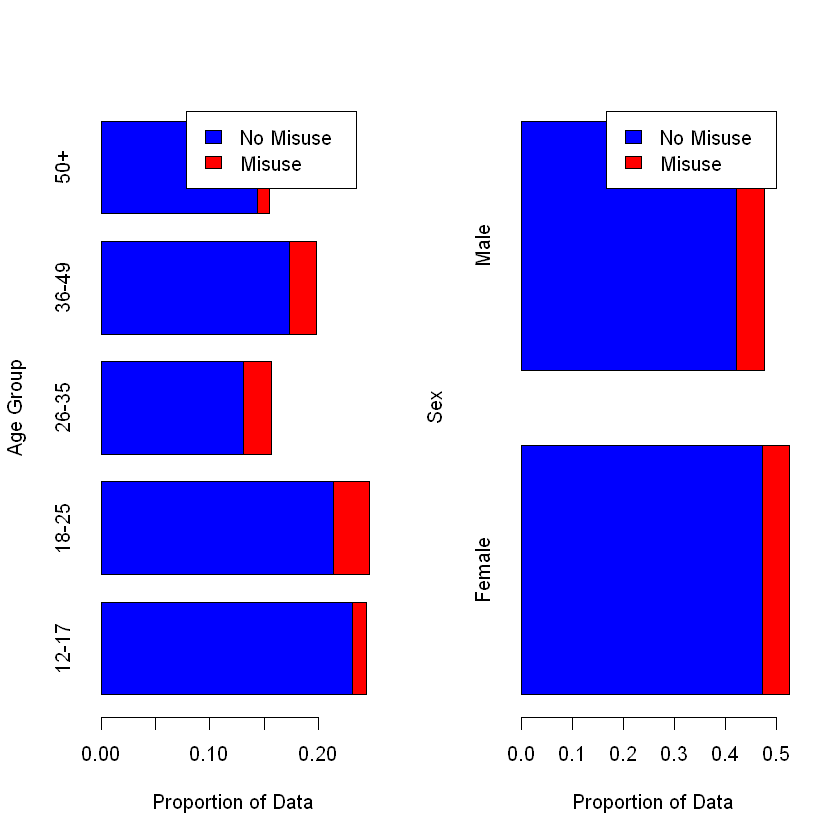

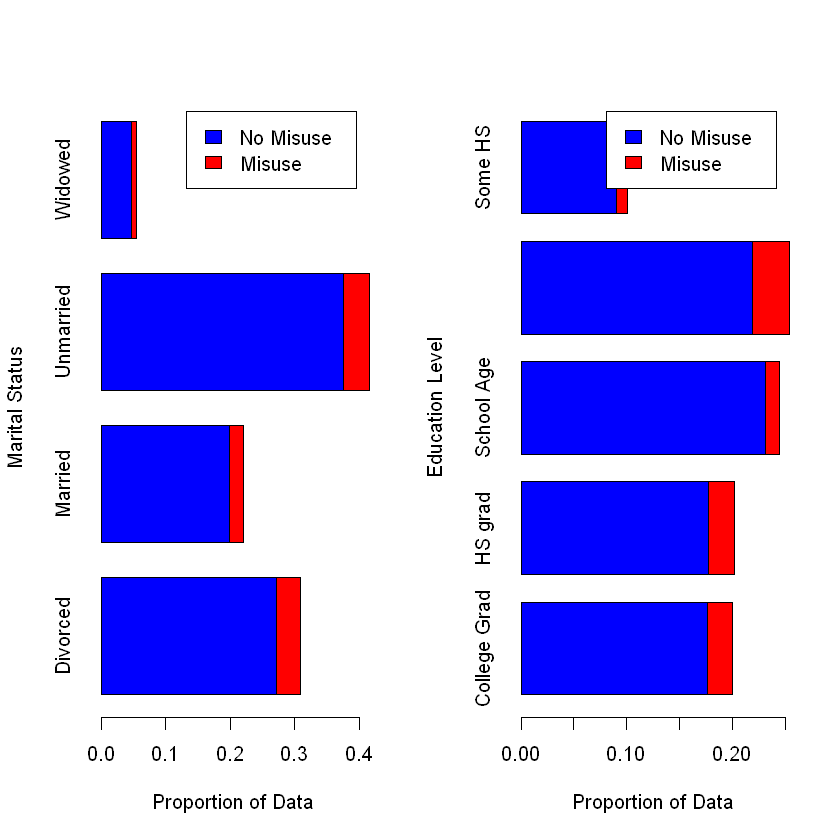

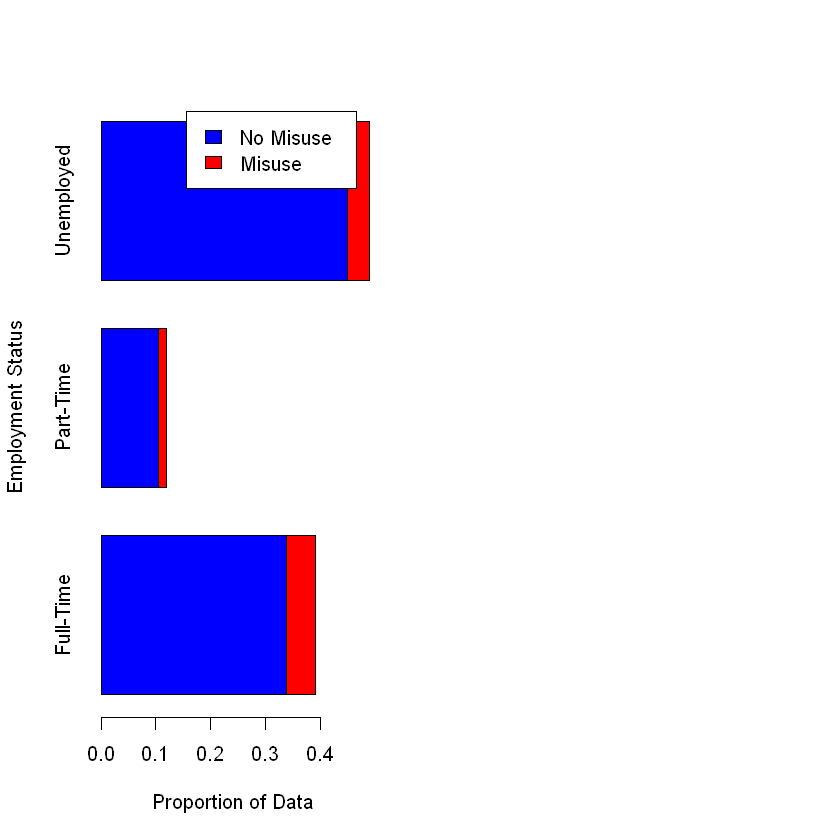

In [26]:
# divide plot area
par(mfrow =c(1,2))

# explore categorical variable relationships
mis_age = xtabs(~PRLMISEVR+AGECAT, data=data)
barplot(prop.table(mis_age), axes=T, space=0.3, horiz=T,
        xlab="Proportion of Data",
        ylab="Age Group",
        main="",
        col=c("blue","red"), legend.text=c("No Misuse","Misuse"))
mis_sex = xtabs(~PRLMISEVR+SEX, data=data)
barplot(prop.table(mis_sex), axes=T, space=0.3, horiz=T,
        xlab="Proportion of Data",
        ylab="Sex",
        main="",
        col=c("blue","red"), legend.text=c("No Misuse","Misuse"))
mis_married = xtabs(~PRLMISEVR+MARRIED, data=data)
barplot(prop.table(mis_married), axes=T, space=0.3, horiz=T,
        xlab="Proportion of Data",
        ylab="Marital Status",
        main="",
        col=c("blue","red"), legend.text=c("No Misuse","Misuse"))
mis_educat = xtabs(~PRLMISEVR+EDUCAT, data=data)
barplot(prop.table(mis_educat), axes=T, space=0.3, horiz=T,
        xlab="Proportion of Data",
        ylab="Education Level",
        main="",
        col=c("blue","red"), legend.text=c("No Misuse","Misuse"))
mis_employ18 = xtabs(~PRLMISEVR+EMPLOY18, data=data)
barplot(prop.table(mis_employ18), axes=T, space=0.3, horiz=T,
        xlab="Proportion of Data",
        ylab="Employment Status",
        main="",
        col=c("blue","red"), legend.text=c("No Misuse","Misuse"))

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.88 loaded
Warning message:
"package 'RColorBrewer' was built under R version 3.6.3"

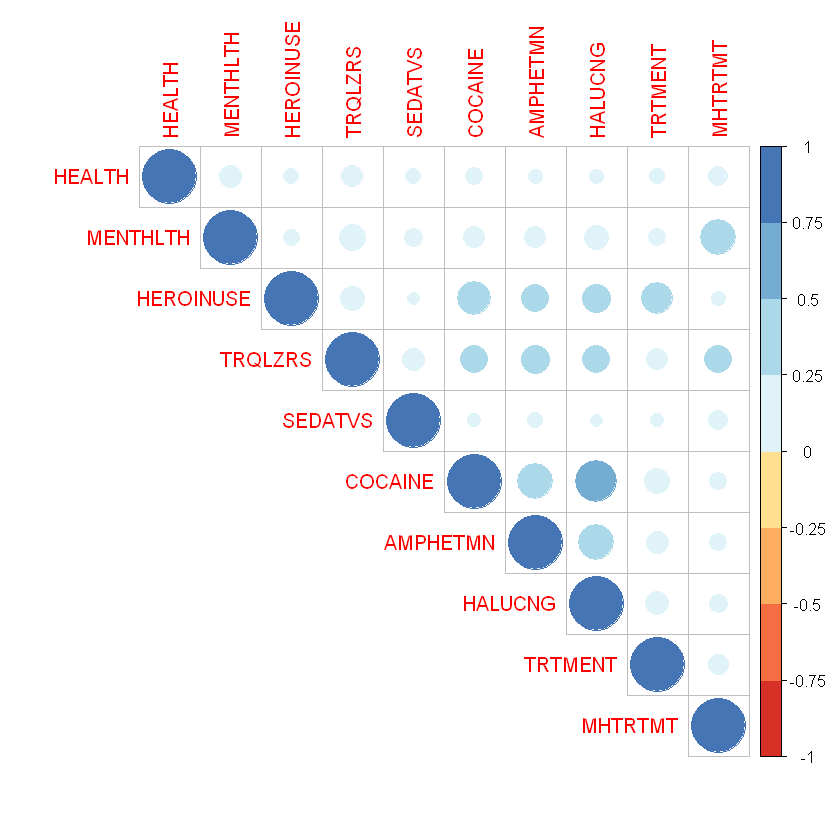

In [6]:
# correlation matrix of numerical data
library(corrplot)
library(RColorBrewer)
data.numeric <- data[,c('HEALTH', 'MENTHLTH', 'HEROINUSE', 'TRQLZRS', 
                        'SEDATVS', 'COCAINE', 'AMPHETMN', 'HALUCNG', 'TRTMENT', 'MHTRTMT')]
M <-cor(data.numeric)
corrplot(M, type="upper", order="original",
         col=brewer.pal(n=8, name="RdYlBu"))

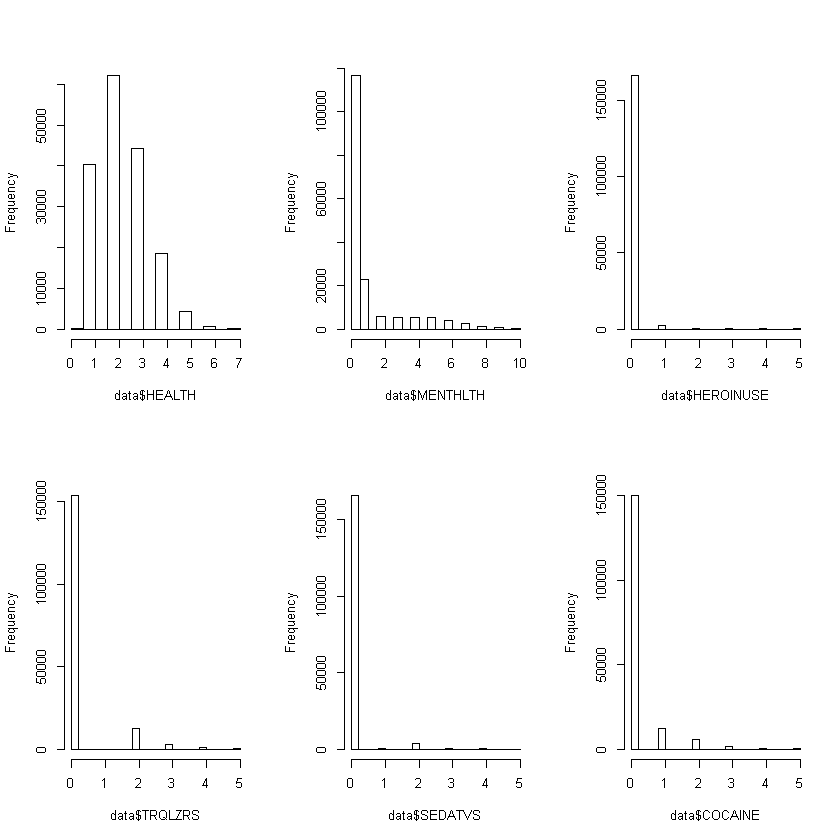

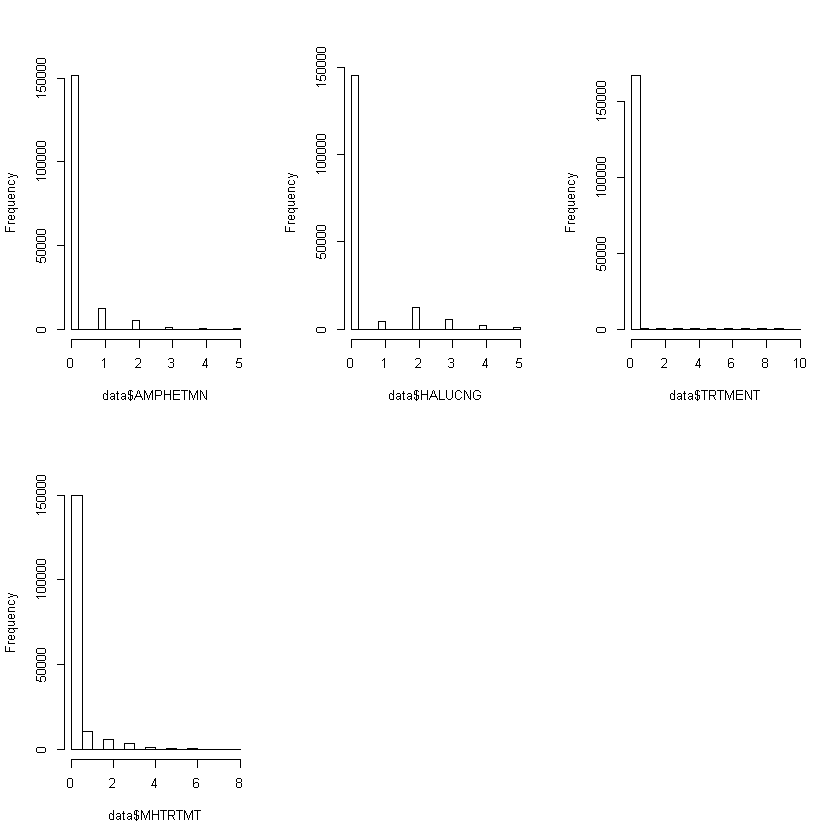

In [7]:
# divide plot area
par(mfrow =c(2,3))

# histograms of numeric data
hist(data$HEALTH, main='')
hist(data$MENTHLTH, main='')
hist(data$HEROINUSE, main='')
hist(data$TRQLZRS, main='')
hist(data$SEDATVS, main='')
hist(data$COCAINE, main='')
hist(data$AMPHETMN, main='')
hist(data$HALUCNG, main='')
hist(data$TRTMENT, main='')
hist(data$MHTRTMT, main='')

2) Split data into train/test sets

In [8]:
# train/test split
set.seed(123)

fractrain = 0.75
fractest = 1-fractrain
flag <- sort(sample(dim(data)[1], dim(data)[1]*fractest, replace = FALSE))
train <- data[-flag,]
test <- data[flag,]
dim(train)
dim(test)

[1] 127738     19

[1] 42579    19

3) Random Forest Model Training and Evaluation

In [9]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine



In [10]:
# build random forest model with default parameters
rf1 <- randomForest(PRLMISEVR ~ ., data = train, importance=TRUE)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
YEAR,26.291074,-8.697044,20.22308,479.0895
AGECAT,45.906068,23.110366,63.70537,873.3091
SEX,4.864025,13.747684,11.96225,378.7788
MARRIED,46.979326,-8.187190,43.41210,588.2207
EDUCAT,24.595180,1.721821,27.22875,925.7046
EMPLOY18,20.199428,5.337514,21.84657,596.6656
CTYMETRO,26.285285,-5.554436,22.15878,703.0472
HEALTH,20.066830,4.764514,20.32546,984.1040
MENTHLTH,4.551776,72.999910,23.98951,1252.3635
HEROINEVR,20.911907,24.668068,26.37380,352.6402


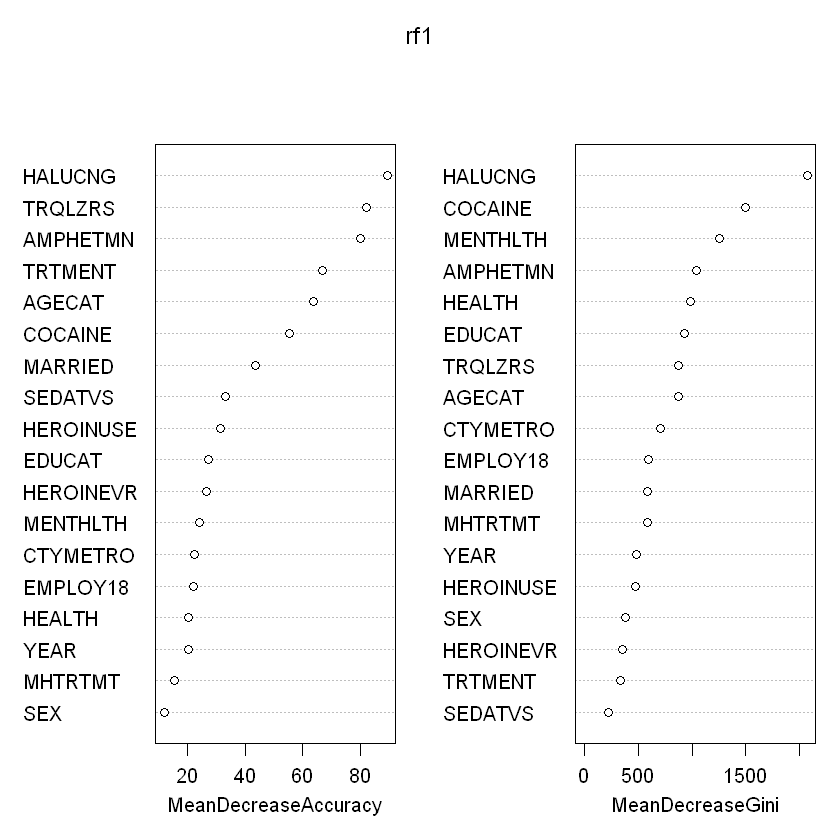

In [11]:
# divide plot area
par(mfrow =c(2,2))

# check for variable importance
importance(rf1)
varImpPlot(rf1)

In [12]:
# get model predictions
pred1 <- predict(rf1, test, type="class")

In [13]:
# output confusion matrix and error rate for rf1
library(caret)
confusionMatrix(pred1, test$PRLMISEVR)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37440  3423
         1   609  1107
                                          
               Accuracy : 0.9053          
                 95% CI : (0.9025, 0.9081)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : 9.346e-16       
                                          
                  Kappa : 0.3144          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9840          
            Specificity : 0.2444          
         Pos Pred Value : 0.9162          
         Neg Pred Value : 0.6451          
             Prevalence : 0.8936          
         Detection Rate : 0.8793          
   Detection Prevalence : 0.9597          
      Balanced Accuracy : 0.6142          
                                          
       'Positive' Class : 0               
                  

In [1]:
# build random forest model with default parameters
rf1 <- randomForest(PRLMISEVR ~ ., data = train, importance=TRUE)

# plot error rate vs number of trees
plot(rf1, ylim=c(0,0.10), main="rf1 Error versus ntrees")

# tune the mtry parameter
try <- tuneRF(x=train[,-10], y=train[,10],
              stepFactor = 1.5,
              plot = TRUE,
              ntree = 100,
              trace = TRUE,
              improve = 1e-5)

# get best mtry
best.mtry <- try[try[, 2] == min(try[, 2]), 1]

# tune nodesize parameter
nodes <- tune(randomForest, PRLMISEVR ~ ., data = train, 
              ranges = list(nodesize = 2:10),
              tunecontrol = tune.control(sampling = "fix"))

# get best nodesize
best.nodesize <- nodes$best.parameters[1,]

# create new random forest model with tuned ntrees, mtry, nodesize
rf2 <- randomForest(PRLMISEVR ~ ., data = train, importance=TRUE, ntree=300, 
                    mtry=best.mtry, nodesize=best.nodesize)

ERROR: Error in randomForest(PRLMISEVR ~ ., data = train, importance = TRUE): could not find function "randomForest"


mtry = 4  OOB error = 9.47% 
Searching left ...
mtry = 3 	OOB error = 9.41% 
0.006446281 1e-05 
mtry = 2 	OOB error = 9.43% 
-0.001829978 1e-05 
Searching right ...
mtry = 6 	OOB error = 9.74% 
-0.03452005 1e-05 


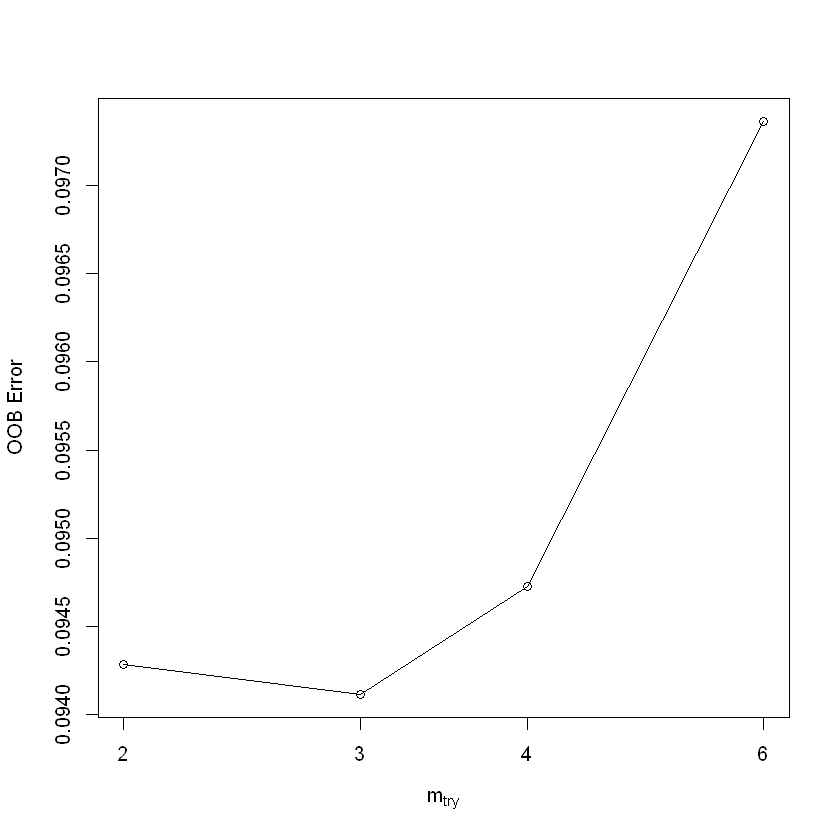

In [15]:
# tune the mtry parameter
try <- tuneRF(x=train[,-10], y=train[,10],
              stepFactor = 1.5,
              plot = TRUE,
              ntree = 100,
              trace = TRUE,
              improve = 1e-5)

In [16]:
# get best mtry
best.mtry <- try[try[, 2] == min(try[, 2]), 1]
best.mtry

[1] 3

In [17]:
library(e1071)
# tune nodesize parameteer
nodes <- tune(randomForest, PRLMISEVR ~ ., data = train, 
              ranges = list(nodesize = 2:10),
              tunecontrol = tune.control(sampling = "fix"))

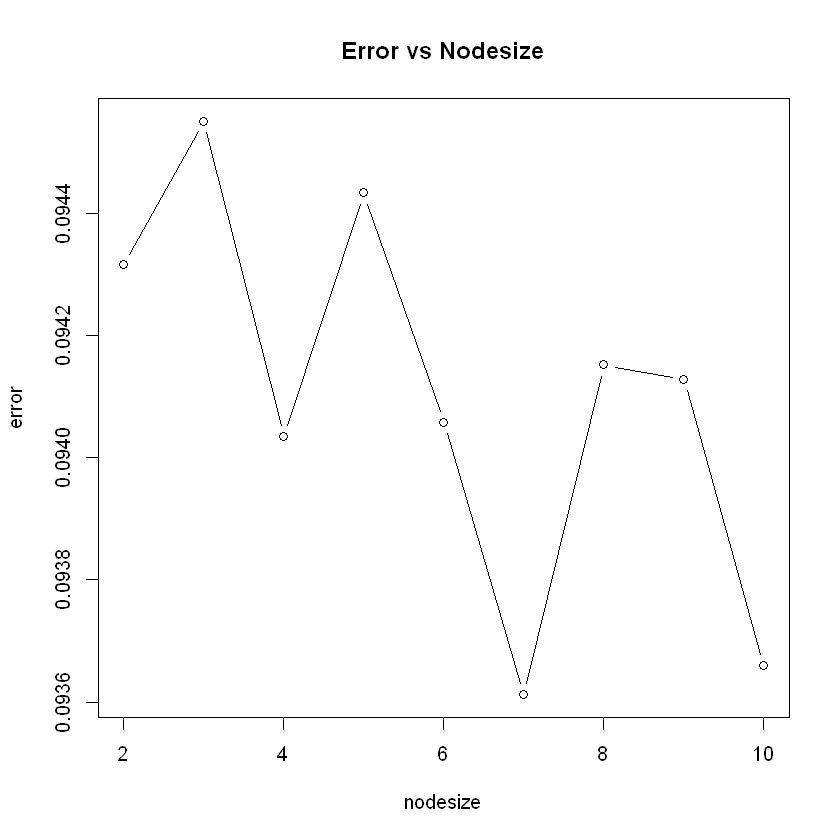

In [18]:
plot(nodes, main="Error vs Nodesize")

In [19]:
# get best nodesize
best.nodesize <- nodes$best.parameters[1,]
best.nodesize

[1] 7

In [20]:
# create new random forest model with tuned ntrees and mtry parameters
rf2 <- randomForest(PRLMISEVR ~ ., data = train, importance=TRUE, ntree=300, mtry=best.mtry, nodesize=best.nodesize)

In [21]:
# get model predictions
pred2 <- predict(rf2, test, type="class")

# output confusion matrix and error rate for rf2
confusionMatrix(pred2, test$PRLMISEVR)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37566  3521
         1   483  1009
                                          
               Accuracy : 0.906           
                 95% CI : (0.9032, 0.9087)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2981          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9873          
            Specificity : 0.2227          
         Pos Pred Value : 0.9143          
         Neg Pred Value : 0.6763          
             Prevalence : 0.8936          
         Detection Rate : 0.8823          
   Detection Prevalence : 0.9650          
      Balanced Accuracy : 0.6050          
                                          
       'Positive' Class : 0               
                  

Warning message:
"package 'ROCR' was built under R version 3.6.3"

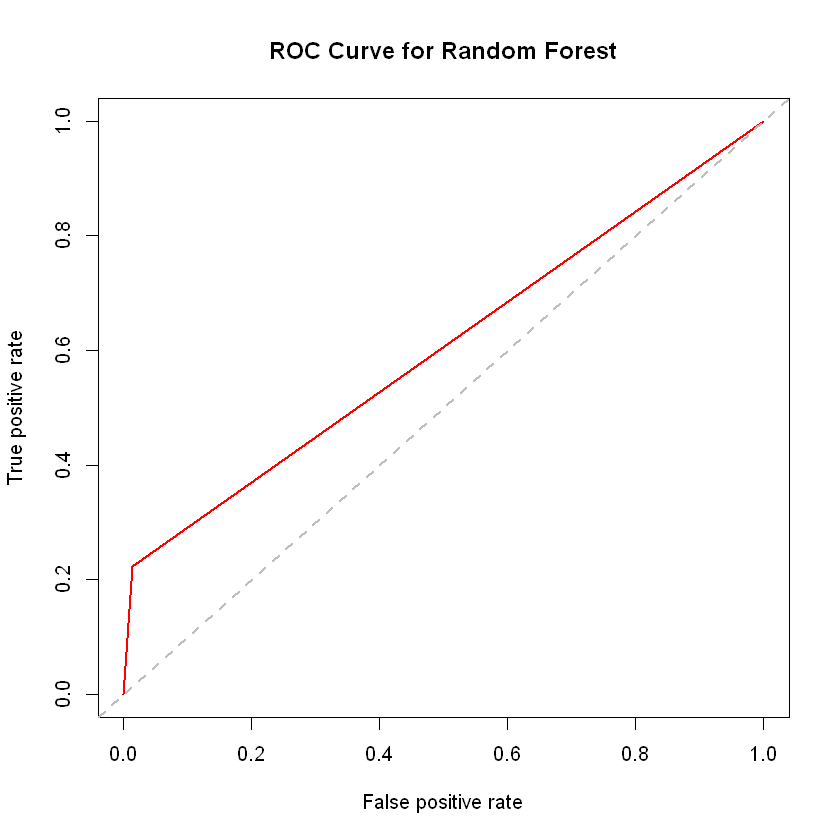

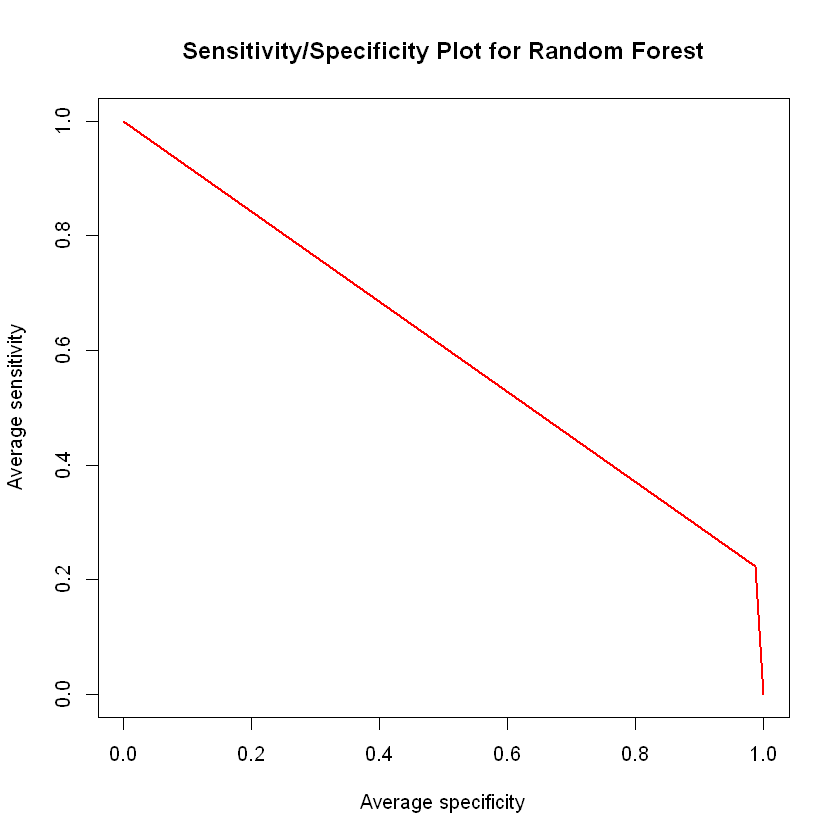

In [22]:
# get performance metrics
library(ROCR)

pred = prediction(as.numeric(as.vector(pred2)), as.numeric(test$PRLMISEVR))

# Plot ROC curve
perf = performance(pred, "tpr","fpr")
plot(perf,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

# Plot sensitivity/specificity
perf = performance(pred, "sens", "spec")
plot(perf,
     avg="threshold",
     col=2,
     lwd=2,
     main="Sensitivity/Specificity Plot for Random Forest")

In [30]:
rf_error1 = mean(pred1 != test$PRLMISEVR)
rf_error2 = mean(pred2 != test$PRLMISEVR)
cat("Random Forest Testing Error Before Tuning: ", rf_error1, "\n")
cat("Random Forest Testing Error After Tuning: ", rf_error2)

Random Forest Testing Error Before Tuning:  0.09469457 
Random Forest Testing Error After Tuning:  0.09403697

In [31]:
# compare with basic logistic regression model
glm1 <- glm(PRLMISEVR ~ ., data = train, family="binomial")

In [35]:
# get predictions
pred.glm1 <- predict(glm1, test, type="response")
pred.glm1 <- replace(pred.glm1, pred.glm1>=0.5, 1)
pred.glm1 <- replace(pred.glm1, pred.glm1<0.5, 0)

# output confusion matrix and error rate for gbm2
pred.glm1 <- as.factor(pred.glm1)
confusionMatrix(pred.glm1, test$PRLMISEVR)
glm1.error = mean(pred.glm1 != test$PRLMISEVR)
cat("Logistic Regression Error: ", glm1.error)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37476  3424
         1   573  1106
                                          
               Accuracy : 0.9061          
                 95% CI : (0.9033, 0.9089)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.317           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9849          
            Specificity : 0.2442          
         Pos Pred Value : 0.9163          
         Neg Pred Value : 0.6587          
             Prevalence : 0.8936          
         Detection Rate : 0.8802          
   Detection Prevalence : 0.9606          
      Balanced Accuracy : 0.6145          
                                          
       'Positive' Class : 0               
                  

Logistic Regression Error:  0.09387257

In [52]:
confusionMatrix(pred.glm1, test$PRLMISEVR)$byClass[[1]]

[1] 0.9849405

In [53]:
# Error Rate comparison
df.comp <- data.frame(Classifier=c("Logistic Regression", "Random Forest (pre-tuning)",
                                  "Random Forest (post-tuning)", "GBM (pre-tuning)", "GBM (post-tuning)"),
                      Error=c(glm1.error, rf_error1, rf_error2, 0.09462411, 0.09279222),
                      Sensitivity=c(confusionMatrix(pred.glm1, test$PRLMISEVR)$byClass[[1]],
                                   confusionMatrix(pred1, test$PRLMISEVR)$byClass[[1]],
                                   confusionMatrix(pred2, test$PRLMISEVR)$byClass[[1]],
                                   0.9839, 0.9839),
                      Specificity=c(confusionMatrix(pred.glm1, test$PRLMISEVR)$byClass[[2]],
                                   confusionMatrix(pred1, test$PRLMISEVR)$byClass[[2]],
                                   confusionMatrix(pred2, test$PRLMISEVR)$byClass[[2]],
                                   0.2461, 0.2631)
                     )

df.comp

Classifier,Error,Sensitivity,Specificity
Logistic Regression,0.09387257,0.9849405,0.2441501
Random Forest (pre-tuning),0.09469457,0.9839943,0.2443709
Random Forest (post-tuning),0.09403697,0.9873058,0.2227373
GBM (pre-tuning),0.09462411,0.9839000,0.2461000
GBM (post-tuning),0.09279222,0.9839000,0.2631000
